In [3]:
import os
import pickle

from code_.encoding_score.rsa import compute_rsa_majajhong, compute_rsa_nsd
from code_.model_activations.loading import load_full_identifier
from config import FIGURES, RESULTS
from code_.model_activations.configs import model_cfg as cfg


In [4]:
dataset = 'majajhong'
region = 'IT'
rsa_metric = 'pearsonr'
rdm_metric = 'euclidean'

# dataset = 'naturalscenes'
# region = 'ventral visual stream'

In [5]:
for region in ['V4','IT']:

    rsa_dict = {}
    models = ['expansion']#,'fully_connected','vit']
    alexnet_iden = f'alexnet_conv5_layers=5_features=256_dataset={dataset}'

    for model_name in models:
        print(f'computing RSA for model: {model_name}')
        rsa_dict[model_name] = []
        model_idens = []
        for features in cfg[dataset]['models'][model_name]['features']:
            activation_iden = load_full_identifier(model_name=model_name, 
                                features = features, 
                                layers=cfg[dataset]['models'][model_name]['layers'], 
                                dataset=dataset)
            model_idens.append(activation_iden) 
        match dataset:
            case 'majajhong':
                for iden in model_idens:
                    rsa_dict[model_name].append(compute_rsa_majajhong(iden, region, rdm_metric, rsa_metric, demo=False))
            case 'naturalscenes':
                for iden in model_idens:
                    rsa_dict[model_name].append(compute_rsa_nsd(iden, region, rdm_metric, rsa_metric))

    with open(os.path.join(RESULTS, f'rsa_euclidean_{dataset}_{region}'), 'wb') as f:
        pickle.dump(rsa_dict, f)
 

computing RSA for model: expansion
/data/atlas/expansion_cache expansion_features=3_layers=5_dataset=majajhong


FileNotFoundError: [Errno 2] No such file or directory: '/data/atlas/expansion_cache/activations/expansion_features=3_layers=5_dataset=majajhong'

In [6]:
# region = 'V4'
# dataset= 'majajhong'


region = 'ventral visual stream'
dataset= 'naturalscenes'


rdm_metric = 'euclidean'
model_name = 'expansion'

with open(os.path.join(RESULTS, f'rsa_rdm_metric={rdm_metric}_{dataset}_{region}'), 'rb') as f:
    rsa_dict = pickle.load(f)

In [7]:

# print(f'computing RSA for model: alexnet')
# match dataset:
#     case 'majajhong':
#         rsa_alexnet = compute_rsa_majajhong(alexnet_iden,region, rdm_metric, rsa_metric)
#     case 'naturalscenes':
#         rsa_alexnet = compute_rsa_nsd(alexnet_iden,region, rdm_metric, rsa_metric)      

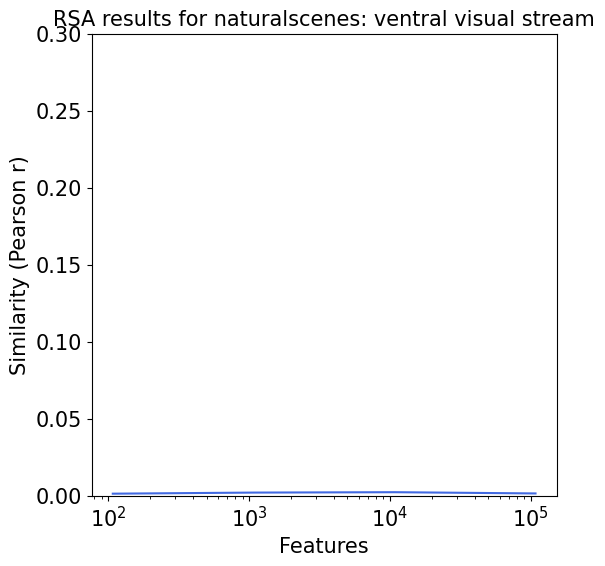

In [8]:
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
# from notebooks.plotting_tools import *

rcParams['figure.figsize'] = (6,6)  
legend_dict ={'expansion':('Convolutional','royalblue'),
    'vit':('Transformer','palevioletred'),
    'fully_connected':('Fully connected','darkviolet')}

# main plot
features = cfg[dataset]['models'][model_name]['features']
if model_name == 'expansion':
    features = [f*36 for f in features] 
elif model_name == 'vit':
    features = [f*196 for f in features] 
else:
    pass

ax1 = sns.lineplot(x=features, 
                    y=rsa_dict[model_name], 
                    c=legend_dict[model_name][1], 
                    label=legend_dict[model_name][0])
# alexnet 
# plt.axhline(y=rsa_alexnet, color='gray', linestyle='--', label='AlexNet')

plt.xlabel('Features',size=15)
plt.ylabel('Similarity (Pearson r)',size=15)
plt.ylim(0,0.3) if dataset == 'naturalscenes' else plt.ylim(0,0.3)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title(f'RSA results for {dataset}: {region}',size=15)
ax1.set_xscale("log")    
if region != 'V4':
    ax1.legend()
ax1.get_legend().remove()
plt.savefig(os.path.join(FIGURES, f'figure_S2_rdm_metric={rdm_metric}_{dataset}_{region}.png'))
plt.show()